# Data Analysis for the data set (Absenteeism at Work)

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from data_utils import *
%matplotlib inline

In [18]:
file = 'dataset/Absenteeism_at_work.csv'

# Load the dataset as DataFrame in Pandas and then convert to matrix
data = load_dataset(file)

Shape of dataset is:(740, 22)
Type of features is:
ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
Absenteeism category                 int64
dty

In [3]:
df = pd.read_csv(file)
df.isnull().any() # check if there is any nan data

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
Absenteeism category               False
dtype: bool

In [4]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism category
0,36,0,7,3,1,118,13,18,50,239554.0,...,1,1,1,0,0,98,178,31,0,0
1,20,0,9,2,4,260,50,11,36,241476.0,...,1,4,1,0,0,65,168,23,0,0
2,29,0,9,2,4,225,26,9,28,241476.0,...,1,1,0,0,2,69,169,24,0,0
3,11,0,9,3,4,289,36,13,33,241476.0,...,1,2,1,0,1,90,172,30,0,0
4,36,0,9,3,4,118,13,18,50,241476.0,...,1,1,1,0,0,98,178,31,0,0


In [20]:
#df.groupby('Absenteeism category').count()

df.groupby(['Absenteeism category']).sum().transform(lambda x: x/np.sum(x)*100)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Absenteeism category,,,,,,,,,,,,,,,,,,,,,
0,67.231681,69.022504,62.692308,65.55057,63.887414,59.795829,63.907511,64.391819,63.489415,62.659152,...,100.0,63.493724,55.172414,59.285714,53.703704,57.246377,63.006531,63.120166,63.294666,19.769711
1,32.768319,30.977496,37.307692,34.44943,36.112586,40.204171,36.092489,35.608181,36.510585,37.340848,...,0.0,36.506276,44.827586,40.714286,46.296296,42.753623,36.993469,36.879834,36.705334,80.230289


One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage histograms using pandas
Reference: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


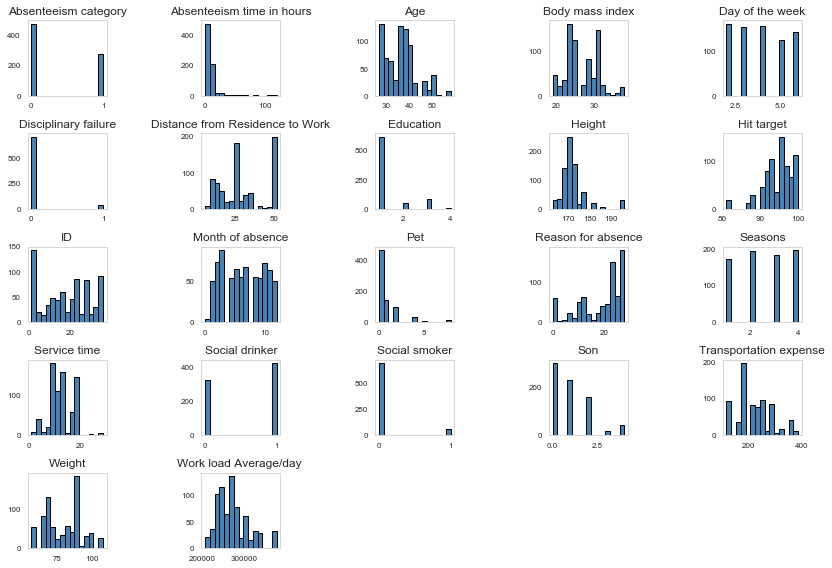

In [6]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

Let’s drill down to visualizing one of the continuous, numeric attributes. Essentially a histogram or a density plot works quite well in understanding how the data is distributed for that attribute.

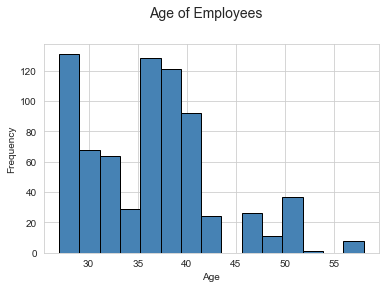

In [7]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age of Employees", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
#ax.text(1.2, 800, r'$\mu$='+str(round(df['Age'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(df['Age'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


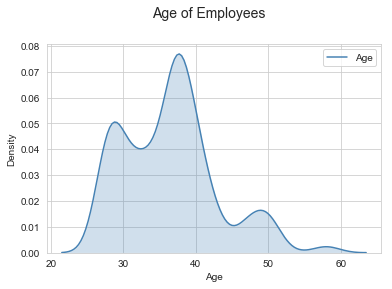

In [8]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Age of Employees", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Age")
ax1.set_ylabel("Density") 
sns.kdeplot(df['Age'], ax=ax1, shade=True, color='steelblue')

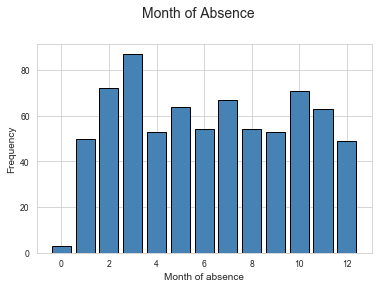

In [9]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Month of Absence", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Month of absence")
ax.set_ylabel("Frequency") 
w_q = df['Month of absence'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix and depict it as a heatmap.

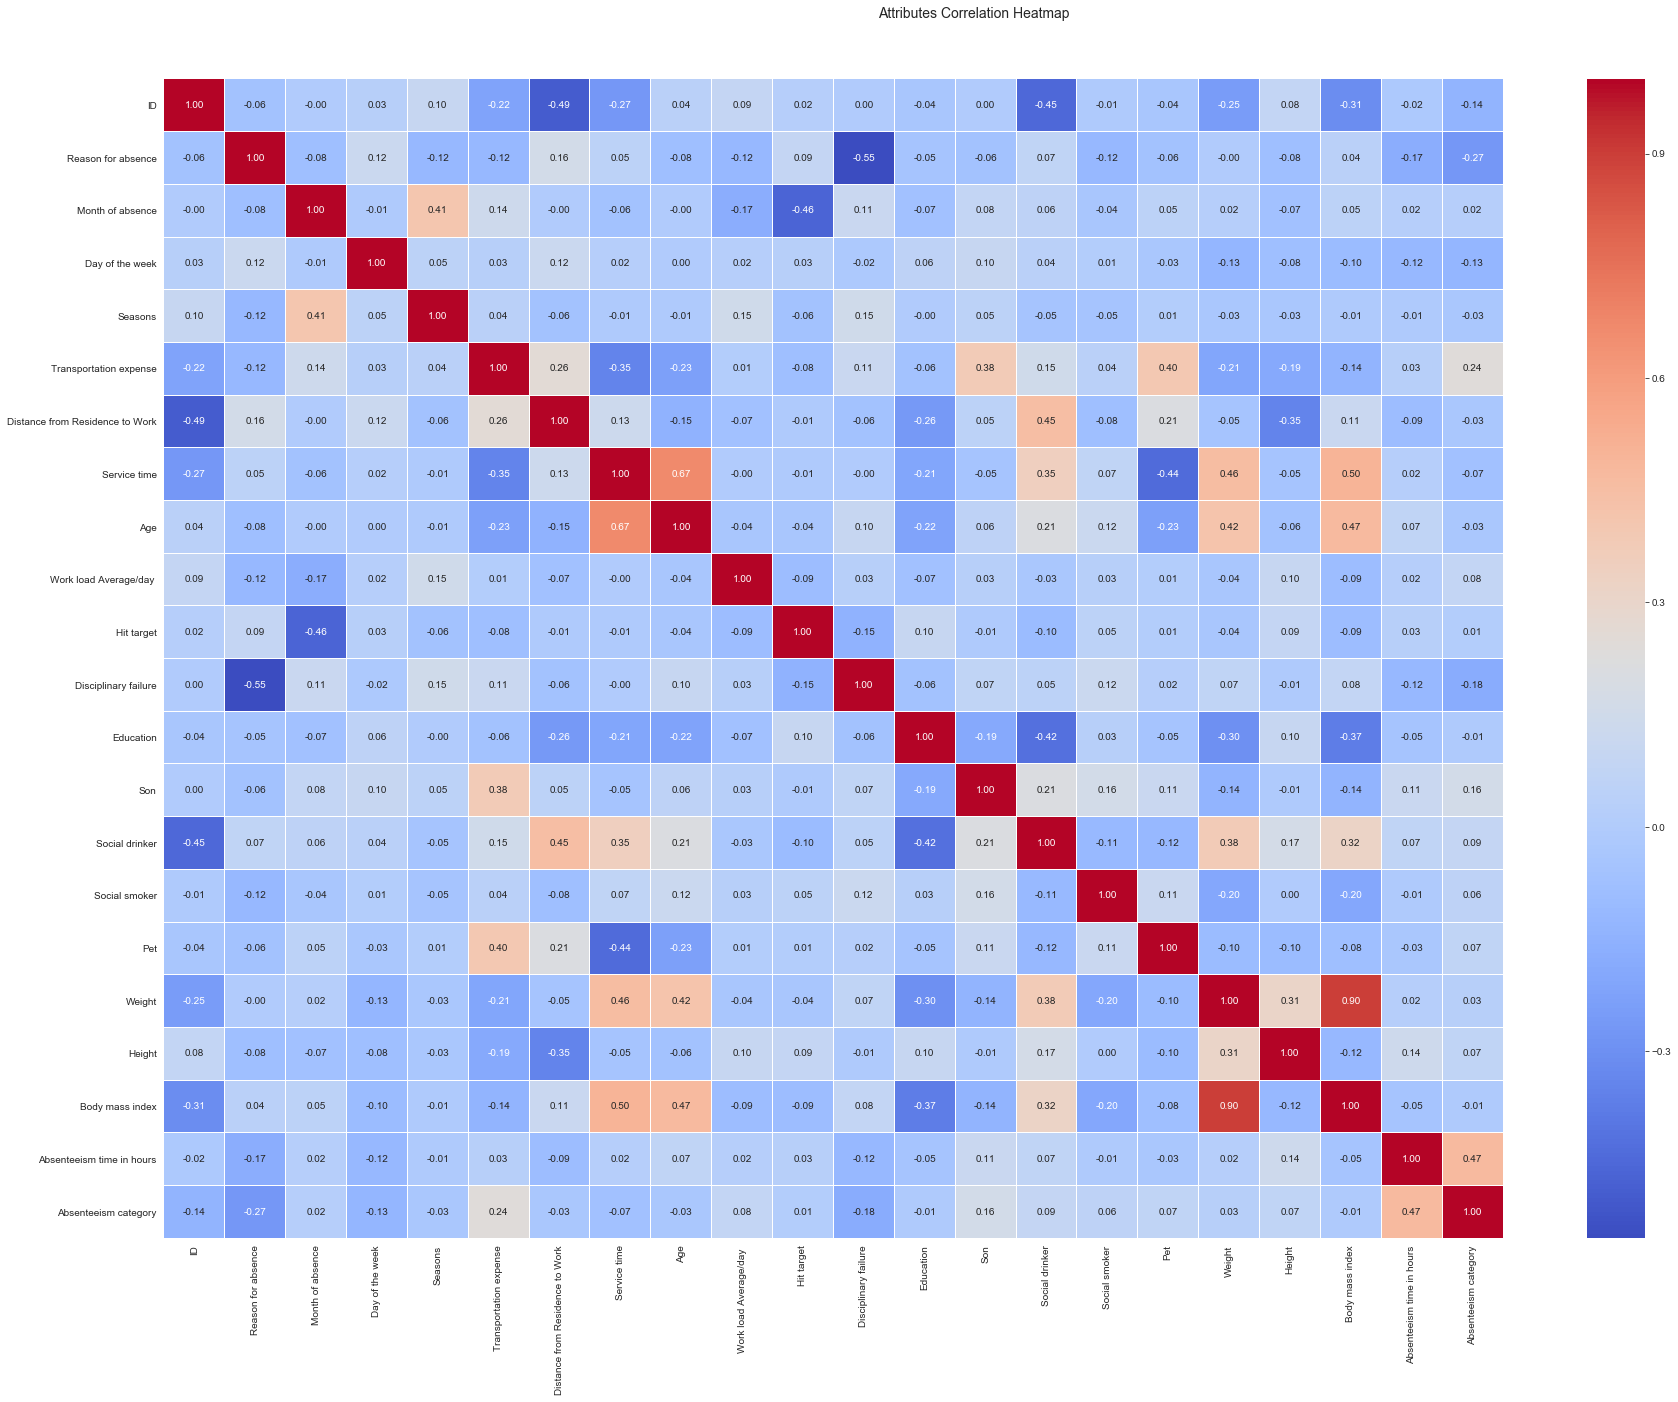

In [10]:
f, ax = plt.subplots(figsize=(30, 20))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

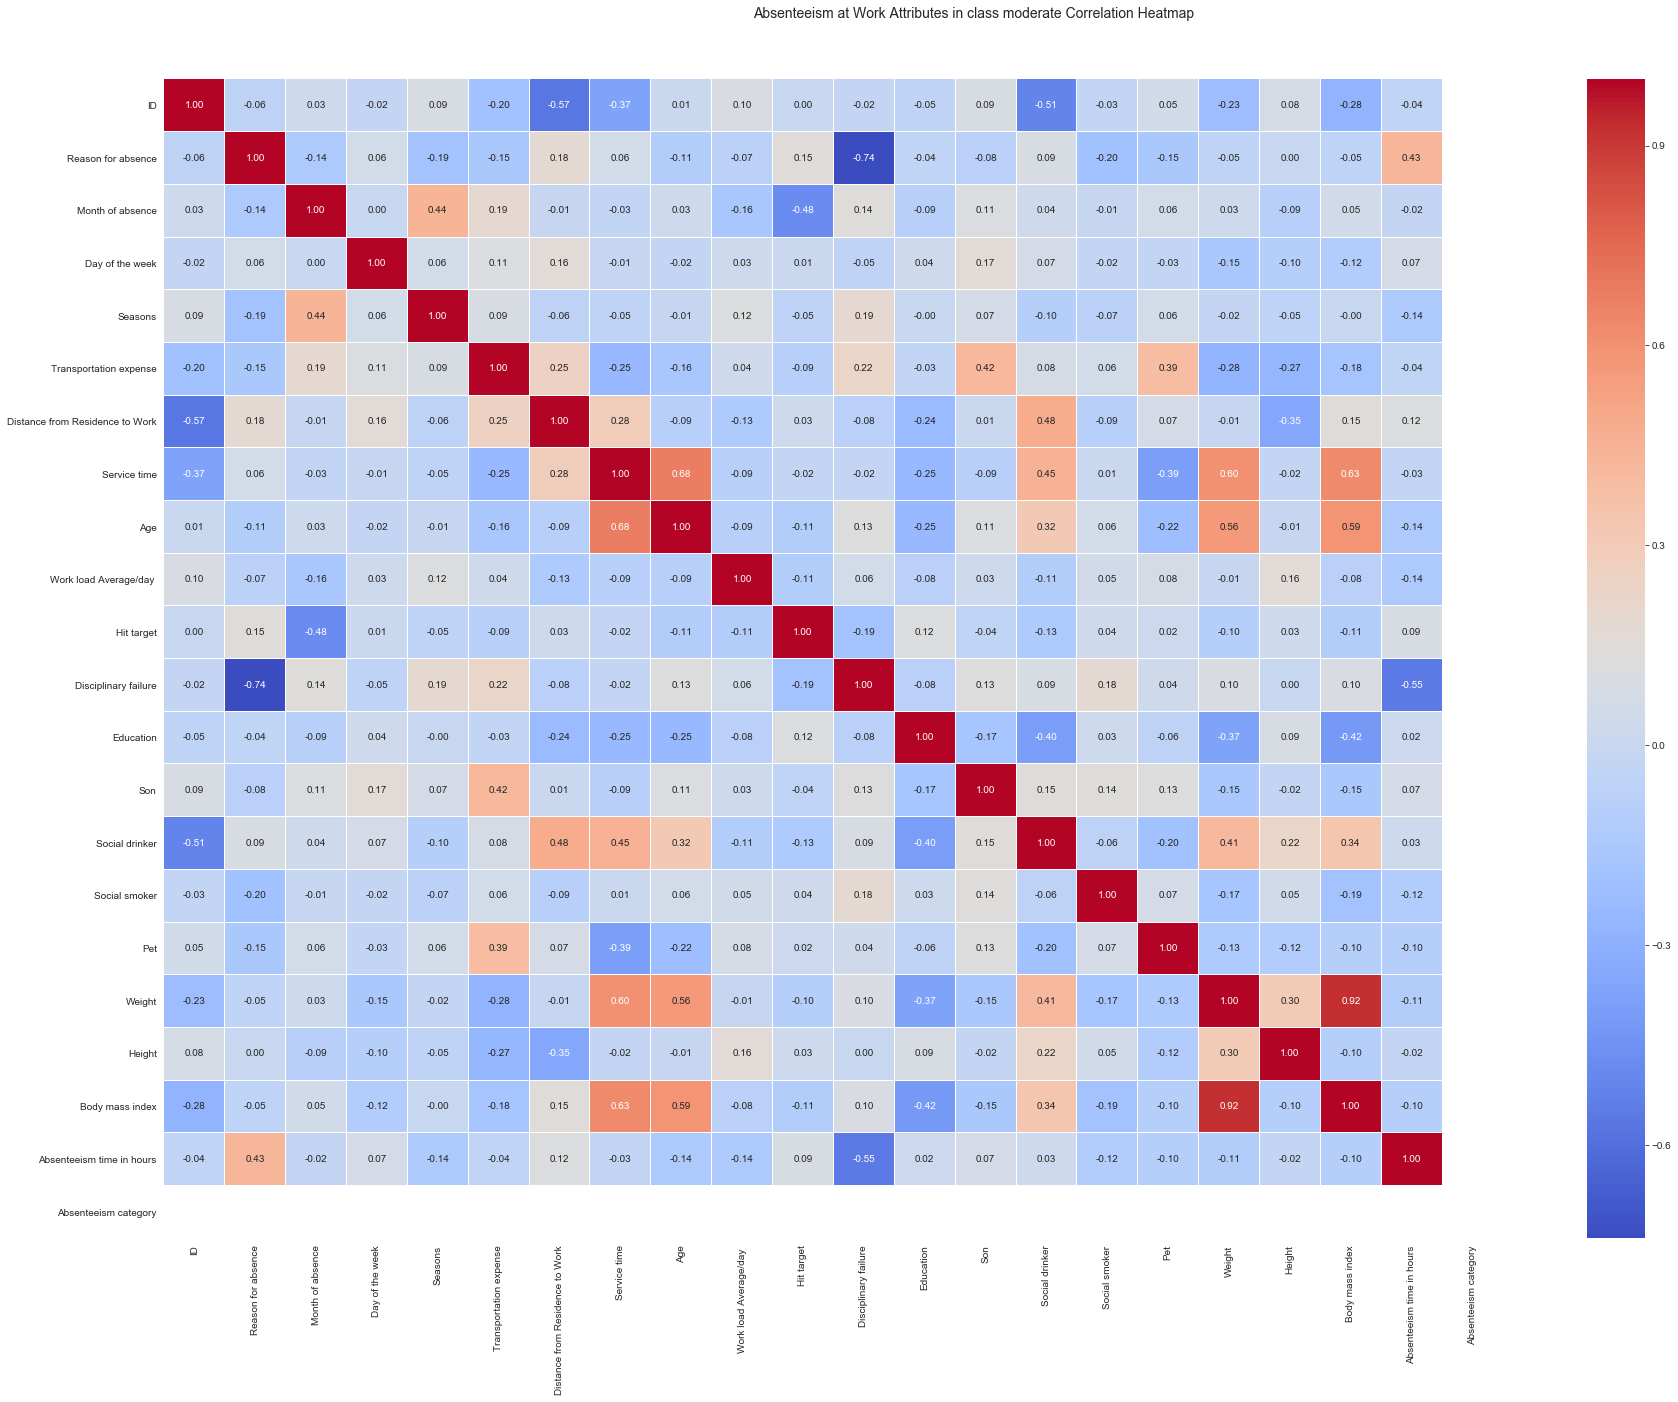

In [11]:
moderate = df[df['Absenteeism category']==0]
excessive = df[df['Absenteeism category']==1]

f, ax = plt.subplots(figsize=(30, 20))
corr = moderate.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Absenteeism at Work Attributes in class moderate Correlation Heatmap', fontsize=14)

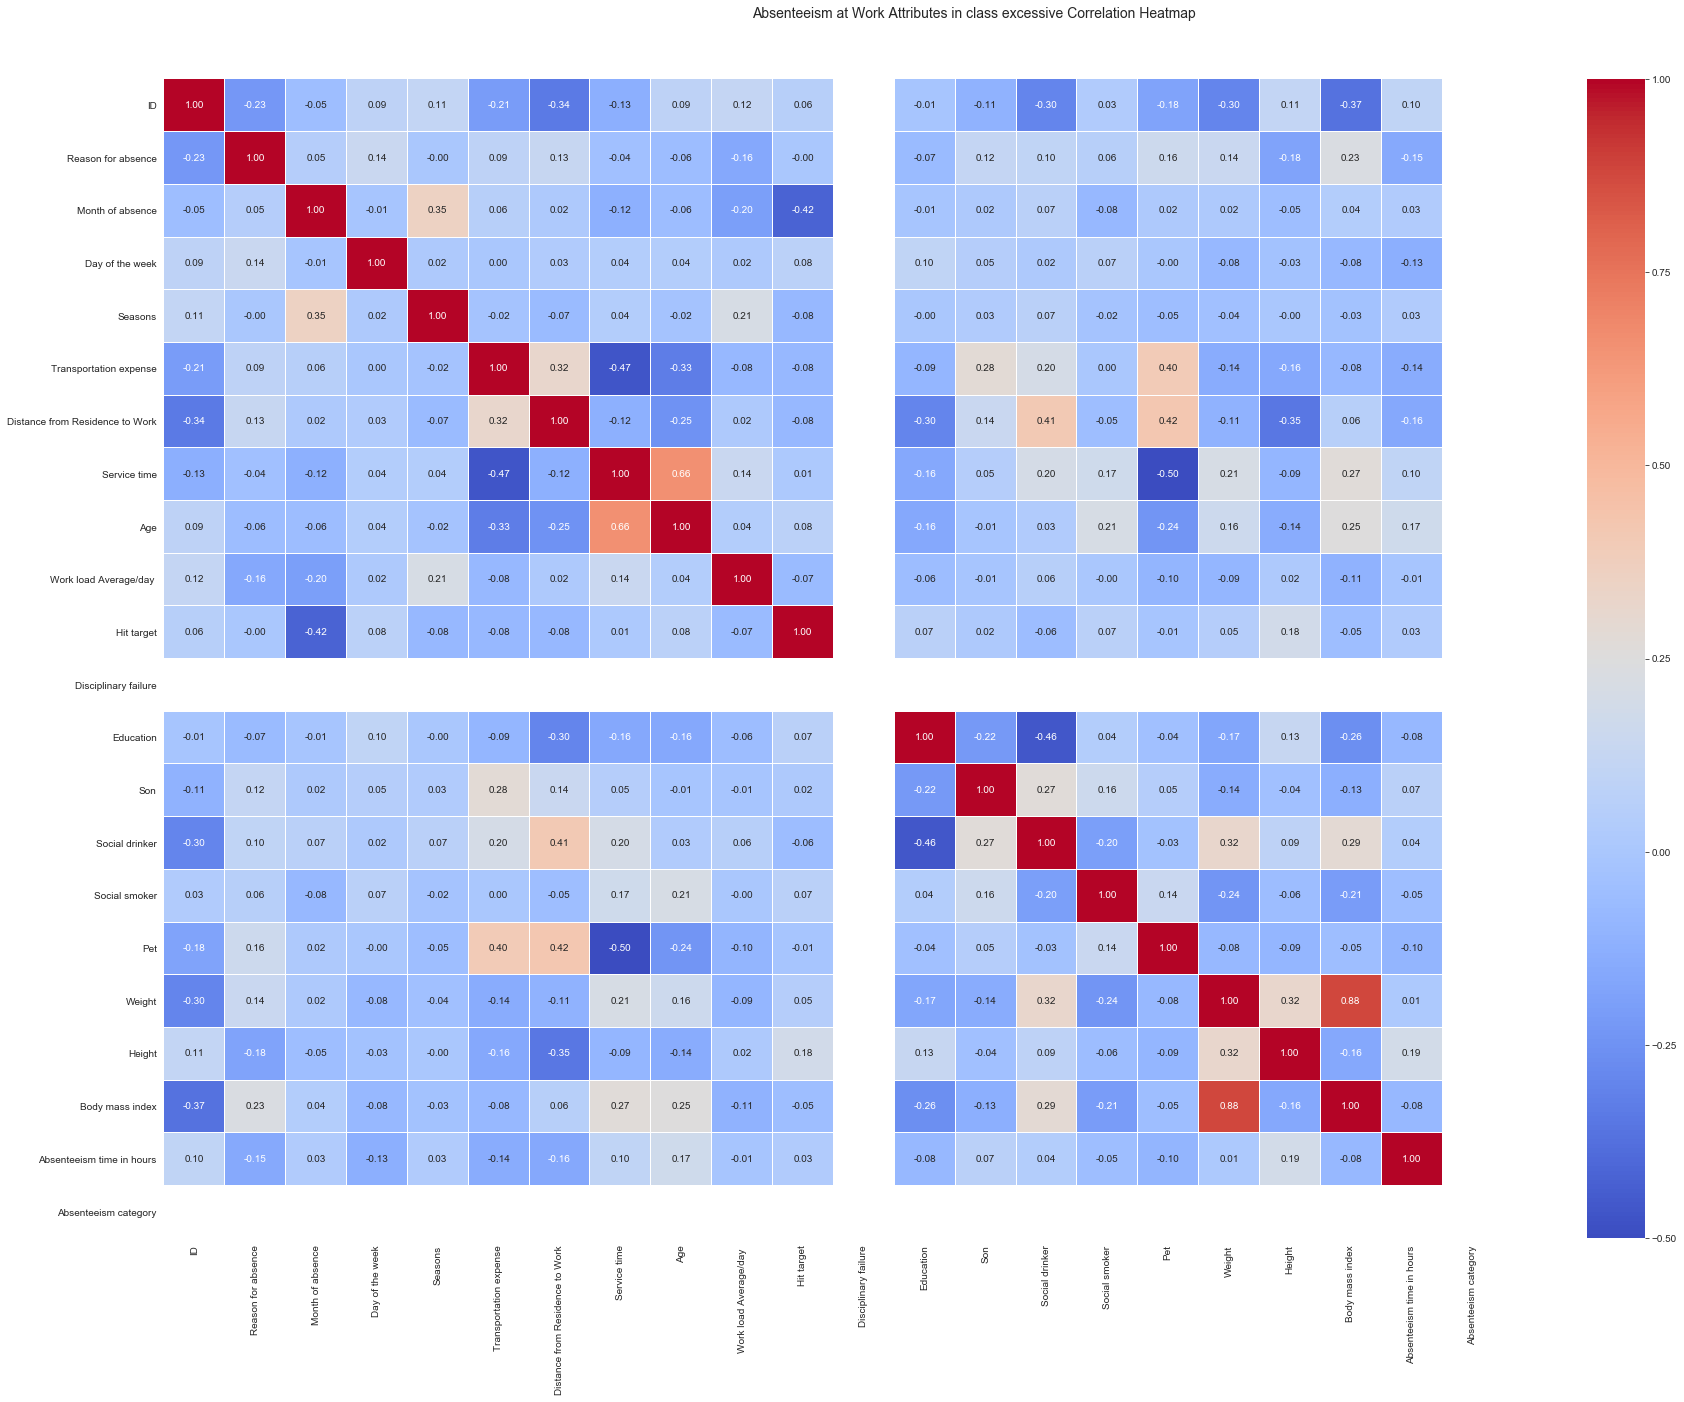

In [12]:
moderate = df[df['Absenteeism category']==0]
excessive = df[df['Absenteeism category']==1]

f, ax = plt.subplots(figsize=(30, 20))
corr = excessive.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Absenteeism at Work Attributes in class excessive Correlation Heatmap', fontsize=14)

Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

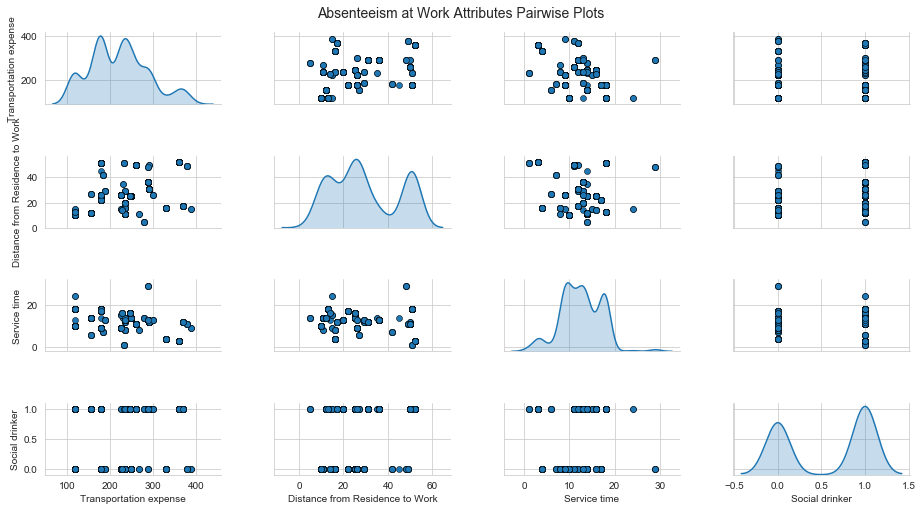

In [13]:
cols = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Social drinker']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Absenteeism at Work Attributes Pairwise Plots', fontsize=14)

In [14]:
cols = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Social drinker']
subset_df = df[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, df['Absenteeism category']], axis=1)
final_df.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Transportation expense,Distance from Residence to Work,Service time,Social drinker,Absenteeism category
0,-1.544379,-1.121694,1.242825,0.872872,0
1,0.577971,1.373794,-0.354652,0.872872,0
2,0.054856,-0.244901,-0.811074,-1.145644,0
3,1.011408,0.429556,0.101770,0.872872,0
4,-1.544379,-1.121694,1.242825,0.872872,0


Another way of visualizing multivariate data for multiple attributes together is to use parallel coordinates. Basically, in this visualization as depicted above, points are represented as connected line segments. Each vertical line represents one data attribute. One complete set of connected line segments across all the attributes represents one data point. Hence points that tend to cluster will appear closer together. 

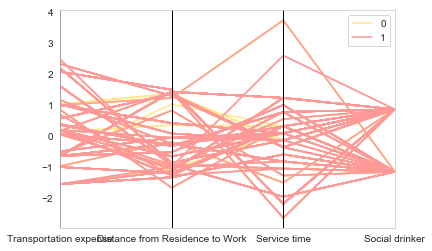

In [15]:
from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(final_df, 'Absenteeism category', color=('#FFE888', '#FF9999'))

Let’s look at some ways in which we can visualize two continuous, numeric attributes. Scatter plots and joint plots in particular are good ways to not only check for patterns, relationships but also see the individual distributions for the attributes.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


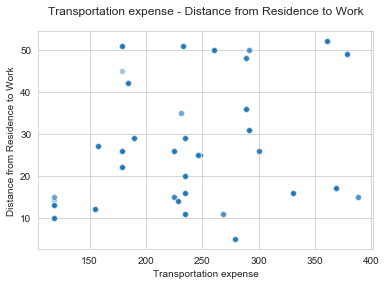

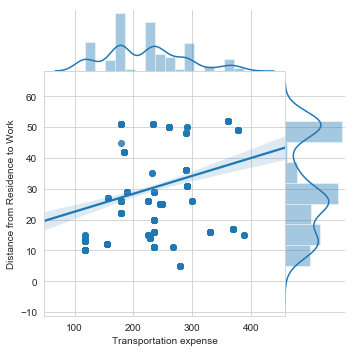

In [16]:
plt.scatter(df['Transportation expense'], df['Distance from Residence to Work'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Transportation expense')
plt.ylabel('Distance from Residence to Work')
plt.title('Transportation expense - Distance from Residence to Work',y=1.05)

jp = sns.jointplot(x='Transportation expense', y='Distance from Residence to Work', data=df,
              kind='reg', space=0, height=5, ratio=4)

How about visualizing two discrete, categorical attributes? One way is to leverage separate plots (subplots) or facets for one of the categorical dimensions.

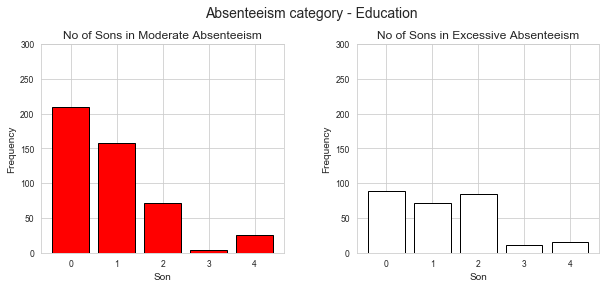

In [17]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Absenteeism category - Education", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

df['Absenteeism category'].value_counts()

moderate = df[df['Absenteeism category']==0]
excessive = df[df['Absenteeism category']==1]


ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("No of Sons in Moderate Absenteeism")
ax1.set_xlabel("Son")
ax1.set_ylabel("Frequency") 
rw_q = moderate['Son'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 300])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("No of Sons in Excessive Absenteeism")
ax2.set_xlabel("Son")
ax2.set_ylabel("Frequency") 
ww_q = excessive['Son'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 300])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

#cp = sns.countplot(x='Son', hue='Absenteeism category', data=df, 
#                   palette={"red": "#FF9999", "white": "#FFE888"})